#### <b>Attrition in HR:</b>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

<b><em>How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.</em></b>


#### <b>Attrition affecting Companies:</b>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/HR Data.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1470
No of Columns: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# As we have 35 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

#### Comment :
- In this HR dataset we have 1470 rows and 35 columns.
- Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.
- Out of 35 we have 9 features with Object datatypes and rest are int64 types
- Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.
- Here We have Target Variable 'Attrition'.

- <b>These Ordinal features come with the following label encoding:</b>

    - Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'
    - EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'
    - JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
    - JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'
    - PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'
    - RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
    - WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

# Statistical Analysis

<b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [7]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

0

### Missing value check

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

### Statistical Matrix

<Axes: >

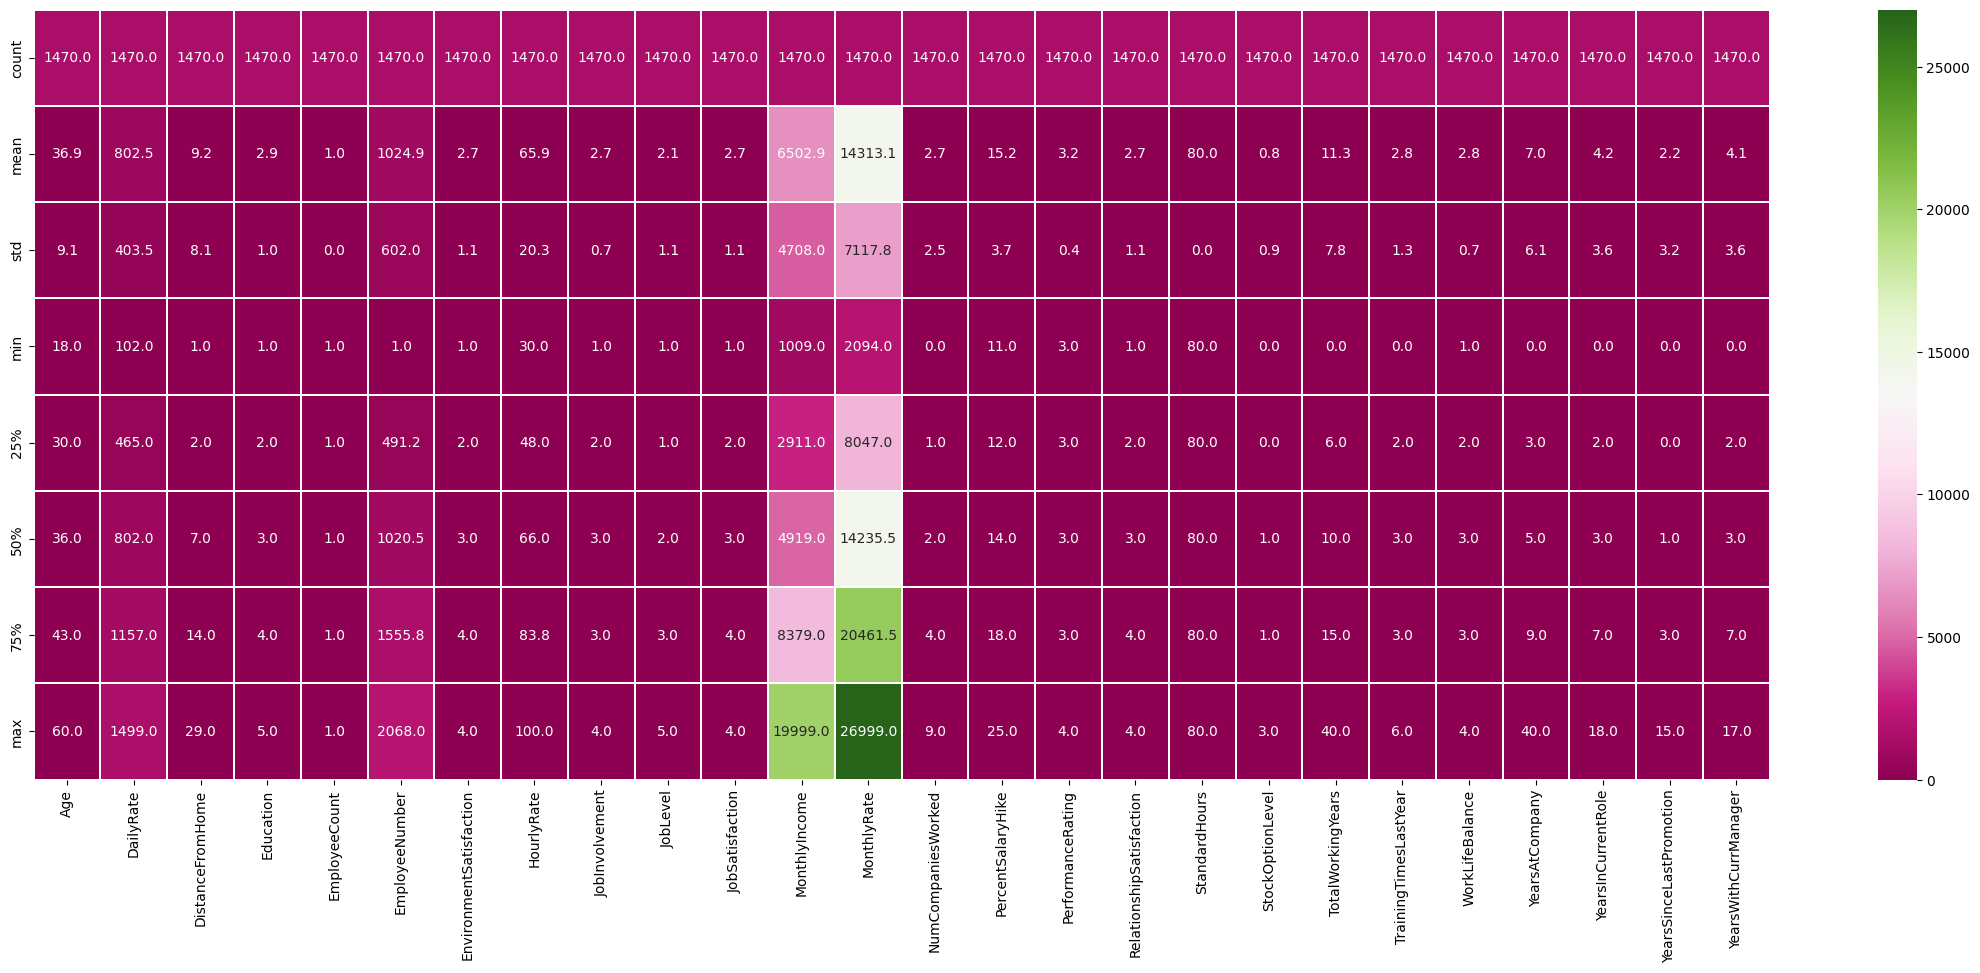

In [9]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [10]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


#### Comment :
- Minimum Empolyee Age is 18 and Maximum age of employee 60.
- Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.
- On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.<b>This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.</b>
- 50% of Employees has <u> worked atleast 2 companies</u> previously.
- For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.
- By looking at Mean and Median we see that some of the features are skew in nature.
- For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.
- StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

- <b> Lets do some Statistical Analysis. Start with target Variable. </b>

In [11]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

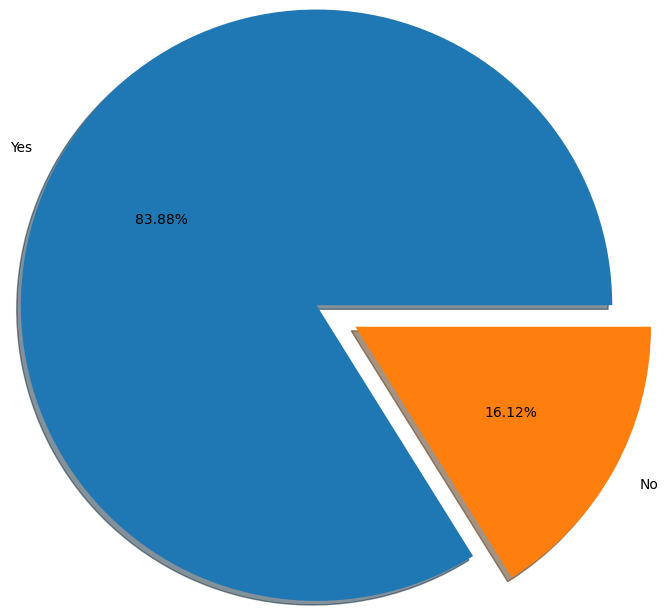

In [12]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

#### Comment:

83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization <b><em> making our dataset to be considered imbalanced </em></b> since more people stay in the organization than they actually leave.

#### <b>  Before arrive at key questions which need to answer about HR Attrition, let try to gain some insight about individual features like distribution of different subcategories, different insight about Human Resource in company like education,job level, working domain.</b>

#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [13]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)


Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
MaritalStatus
Married     673
Single 

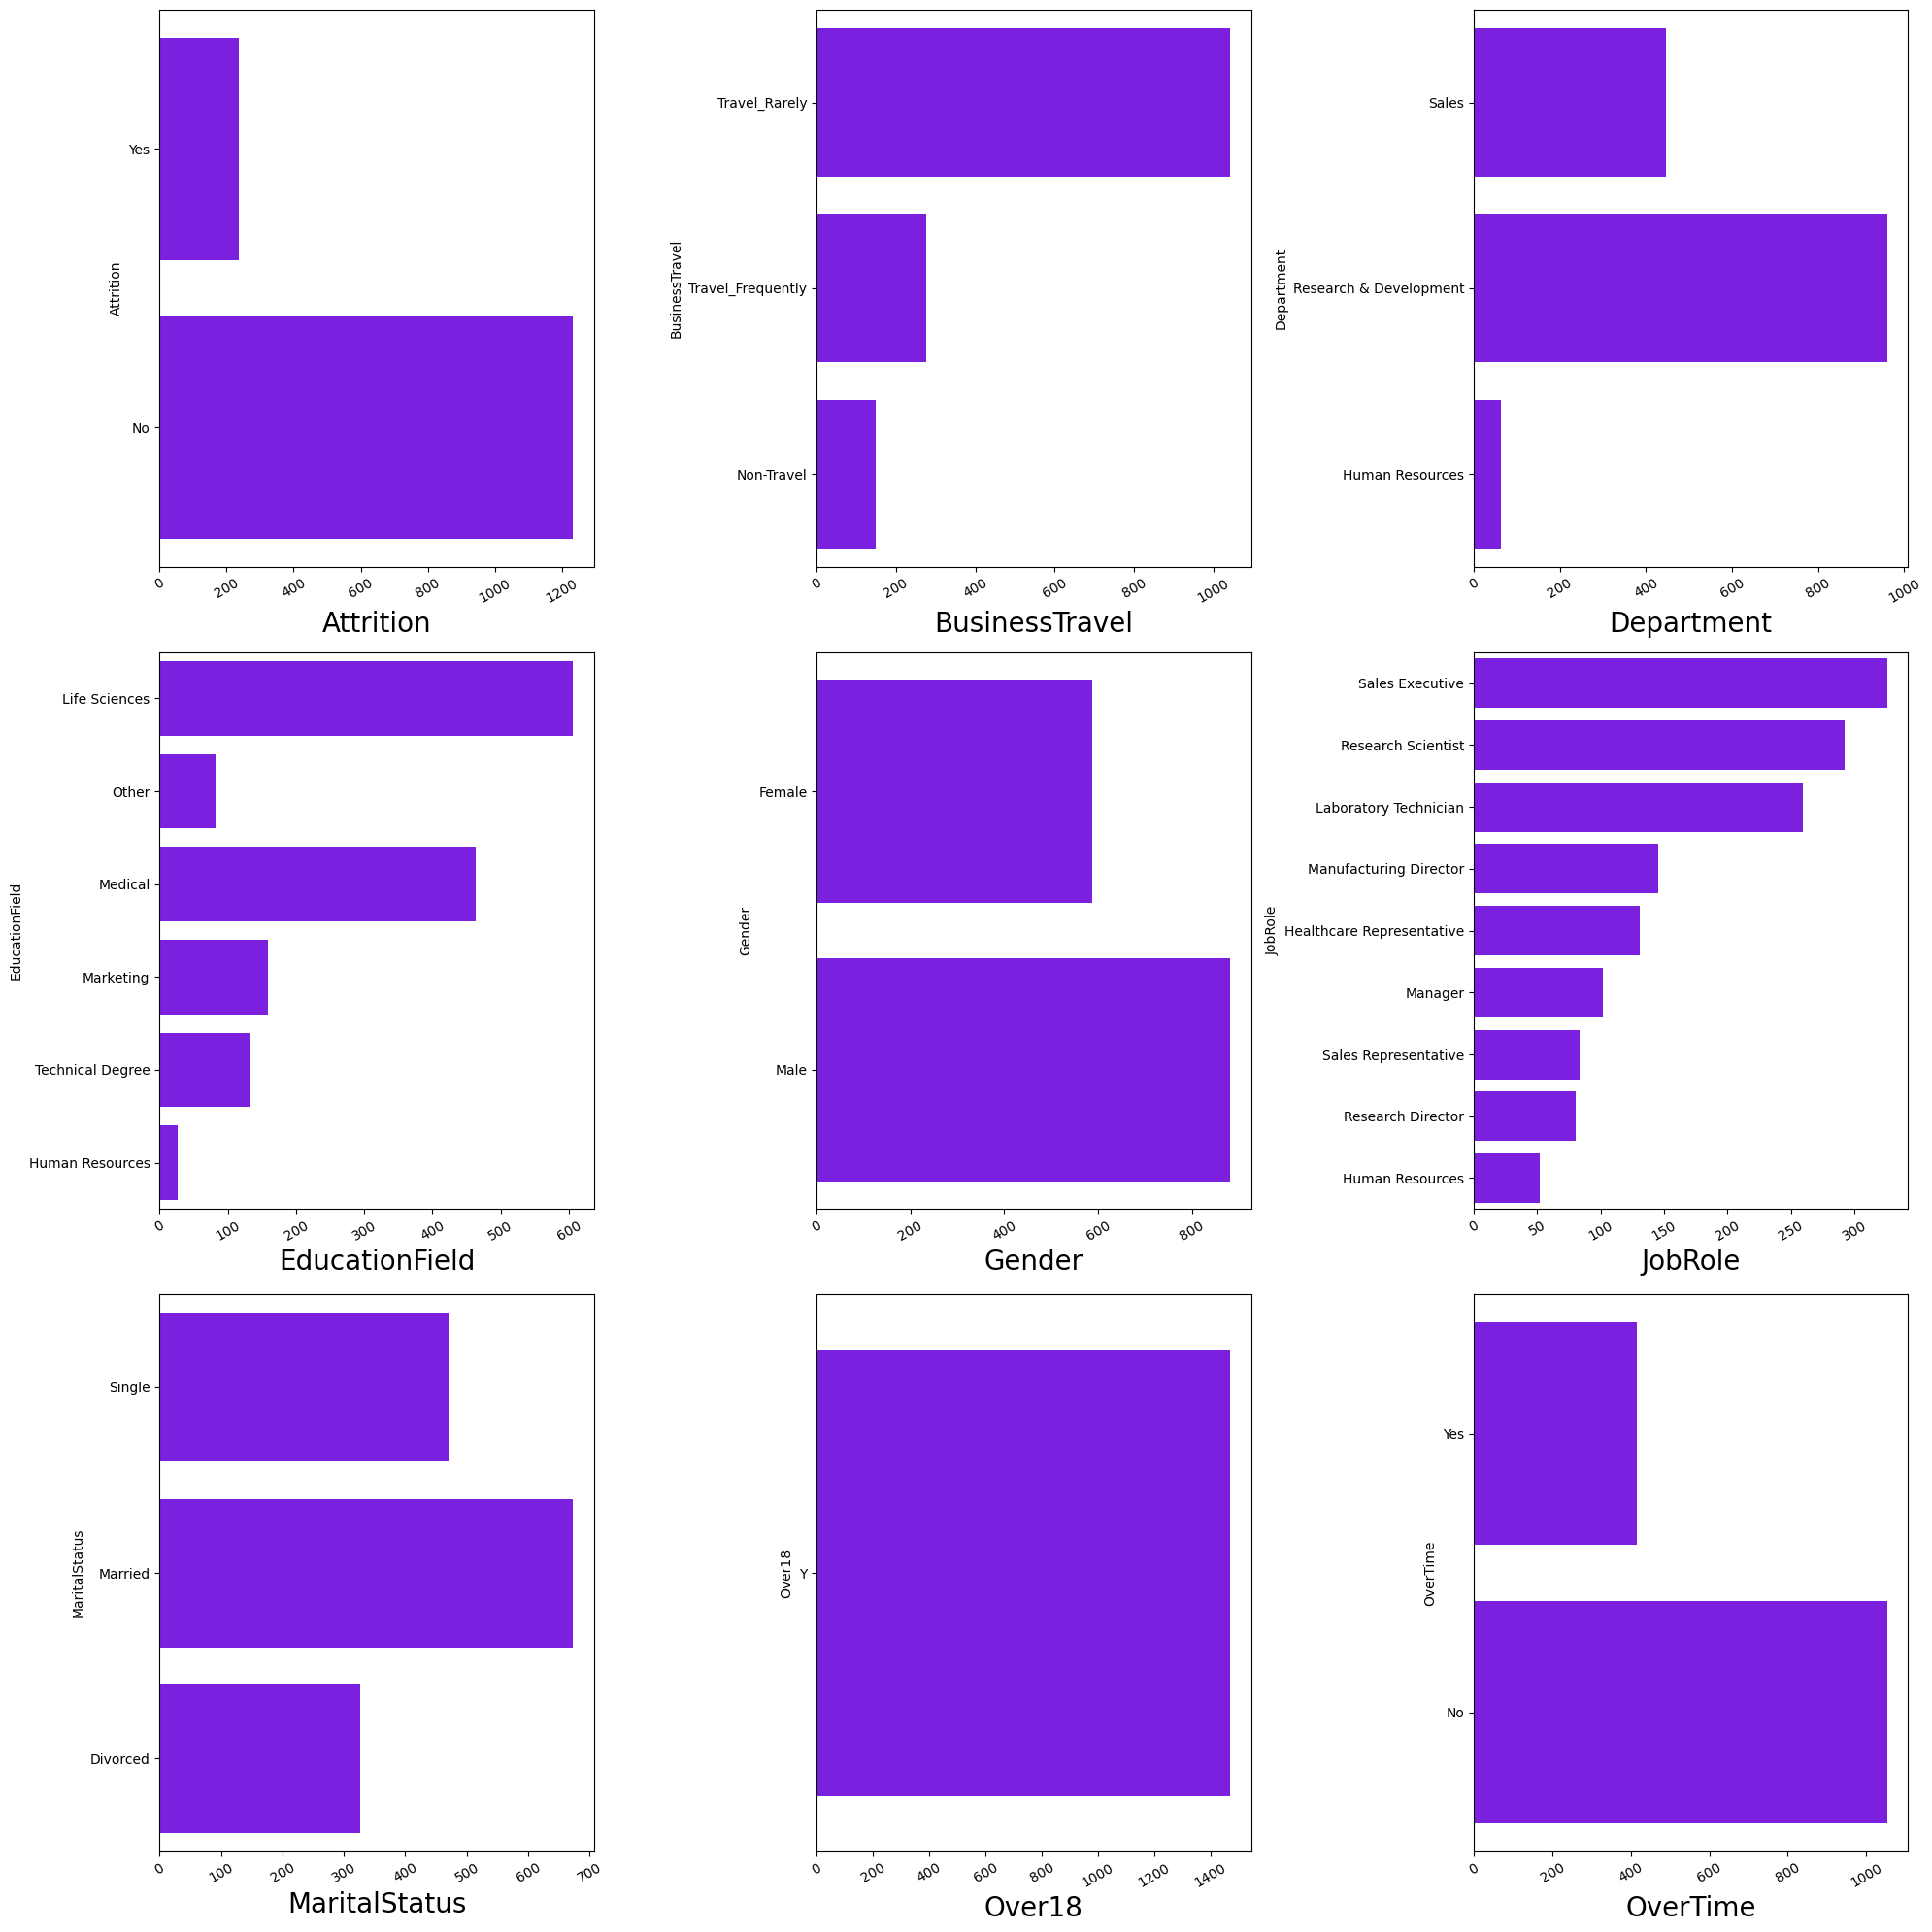

In [14]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Enlisting Value counts & Sub-categories of different Ordinal features available

In [15]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


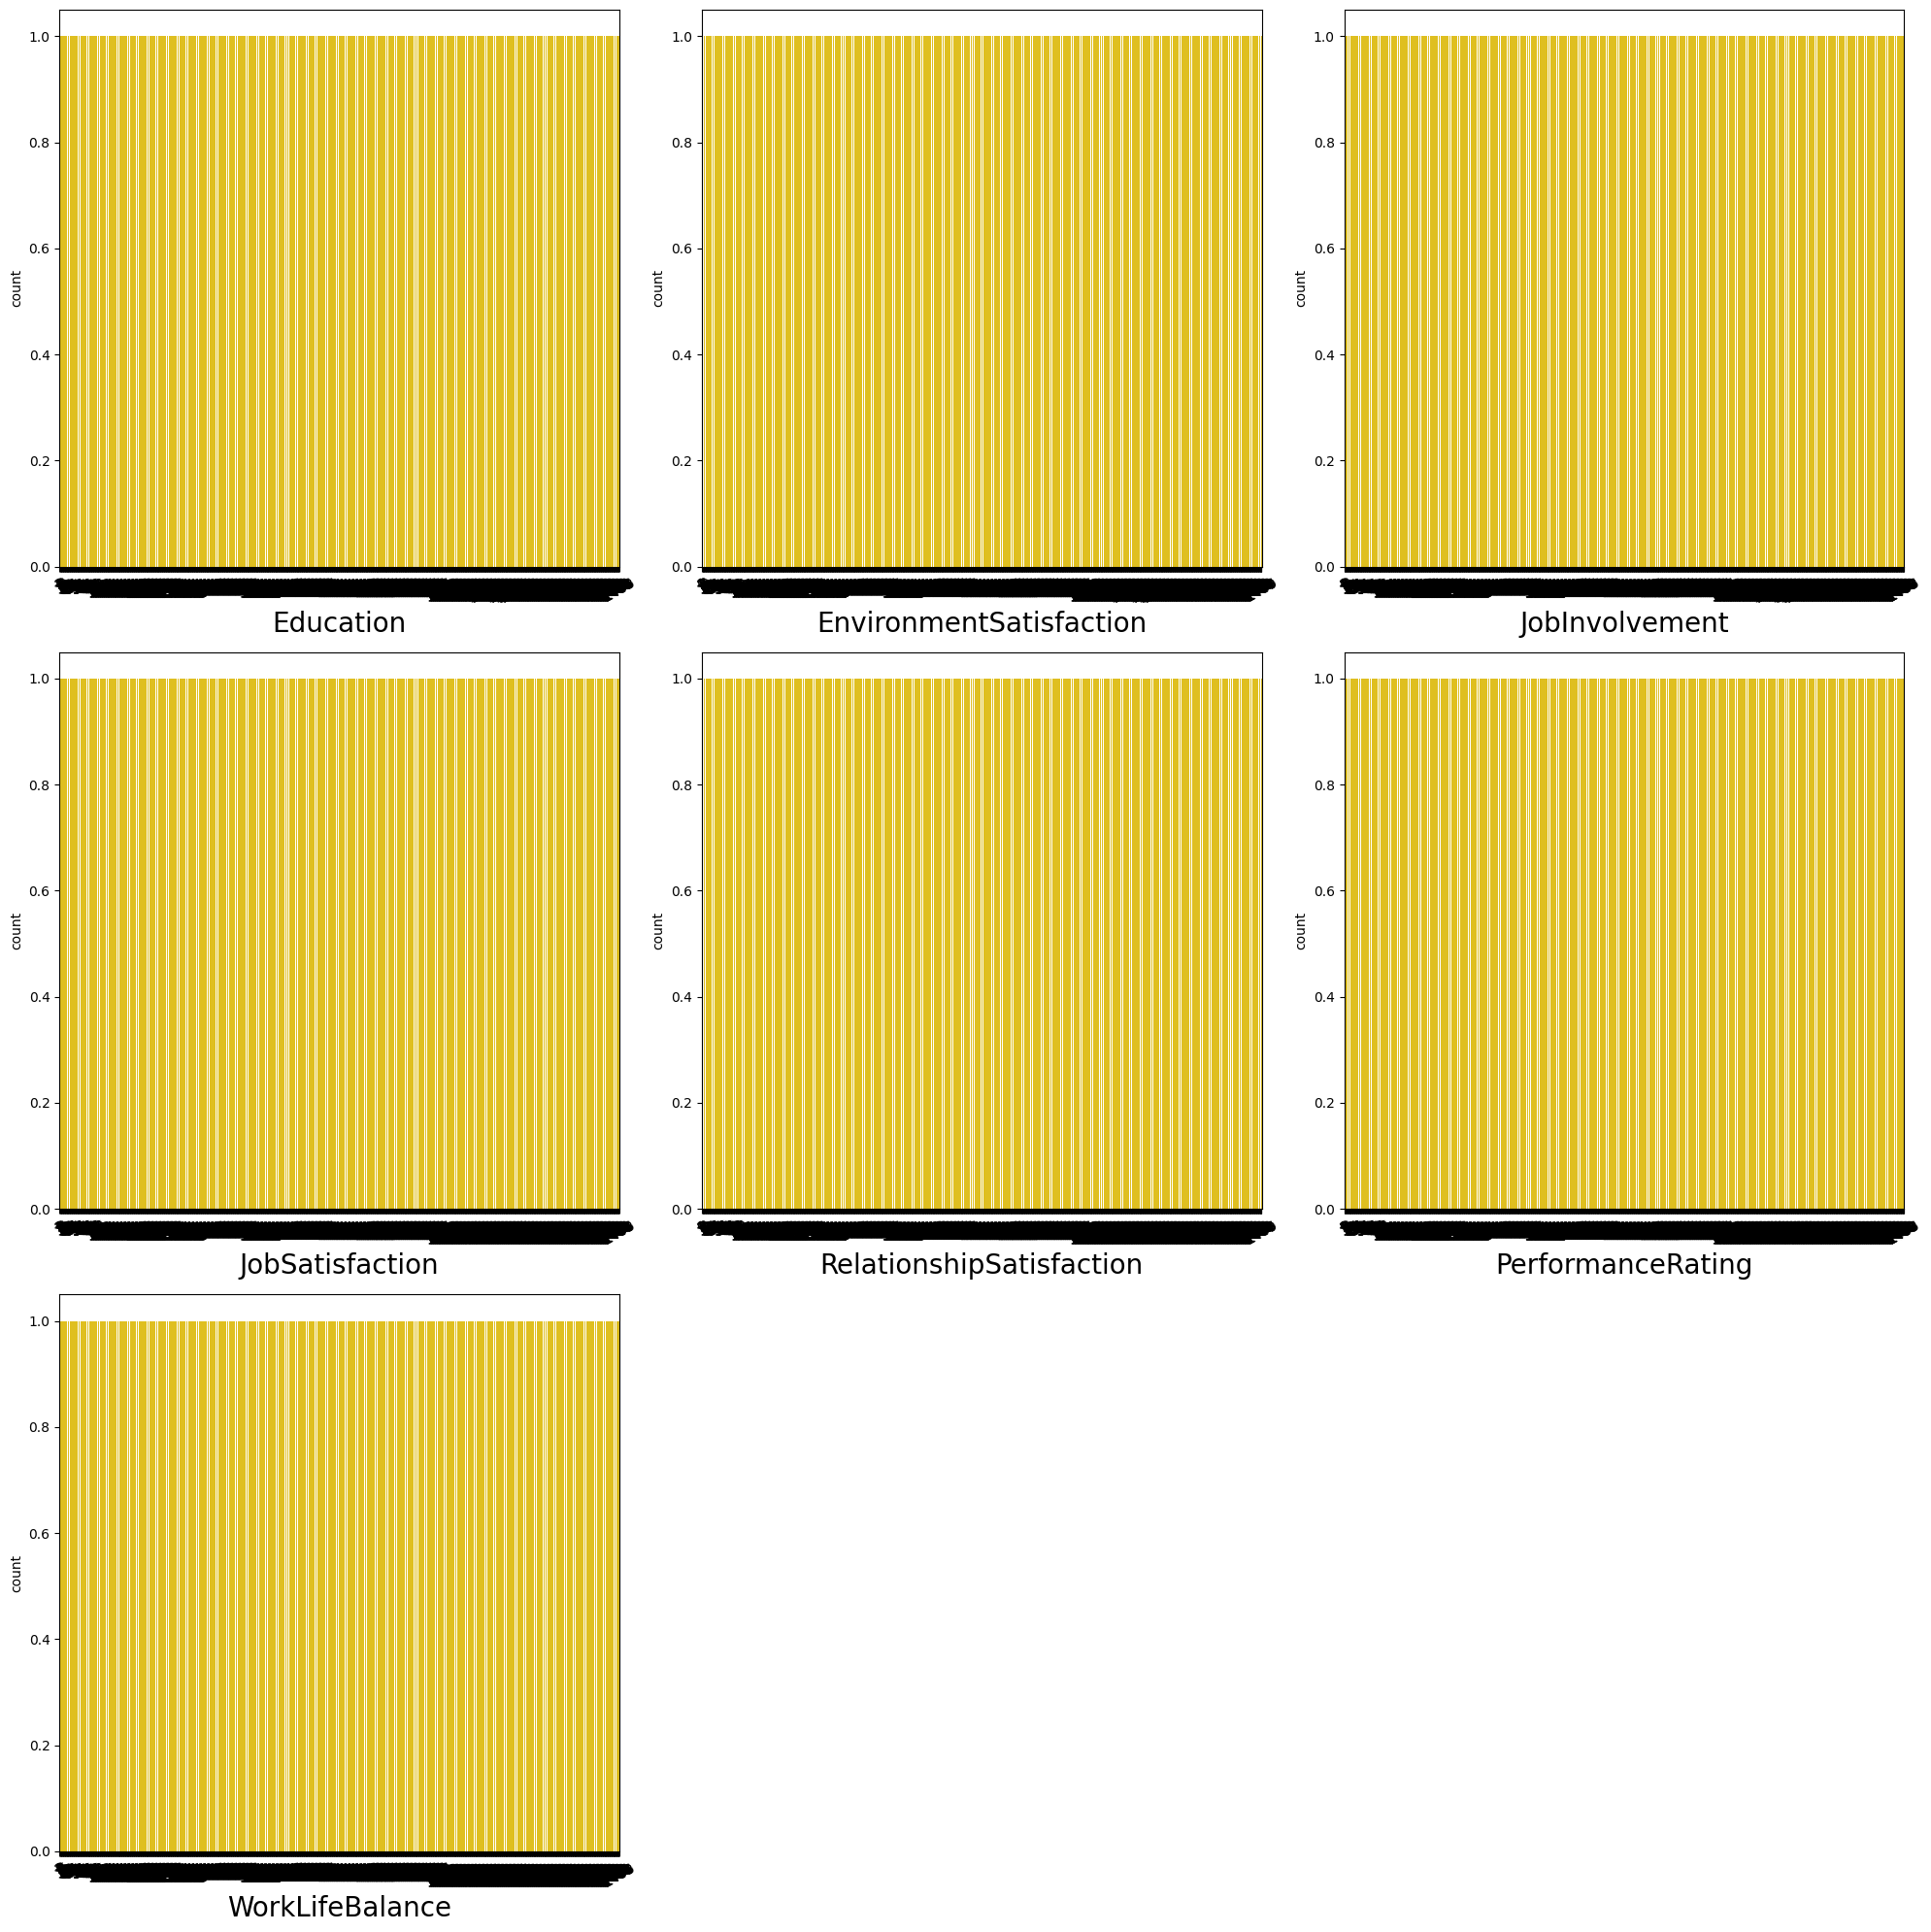

In [16]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Education level of Man power available

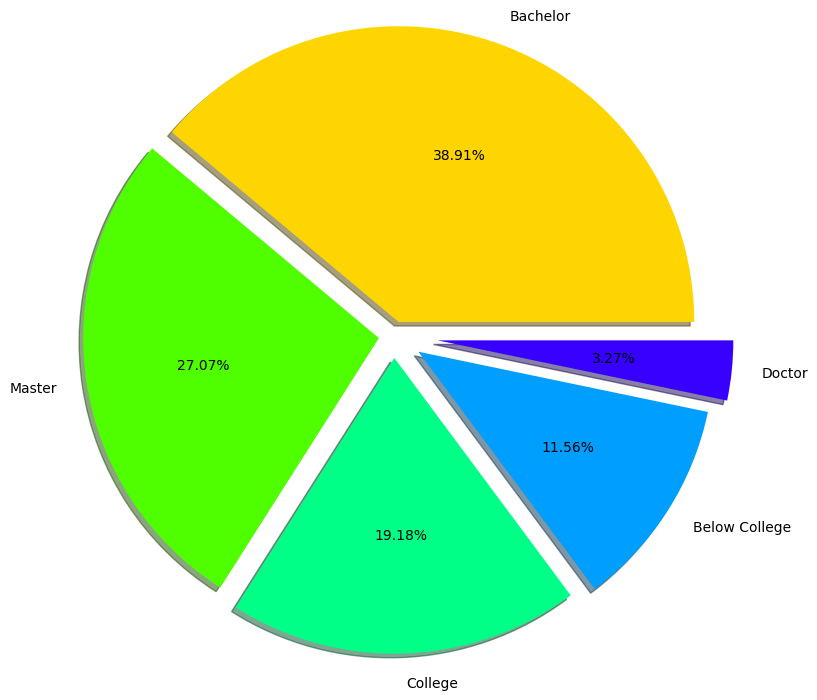

In [17]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

#### Comment:
- More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.
- 30 % of Employees are highly educated which involves master and doctor degree.
- 39 % of Employees are graduate.
- Almost 19% Employees are educated upto college & 12% are below college.
    
#### Lets try to gain insight on to which department this Human Resource belong and education need of each department through visualization.

In [18]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

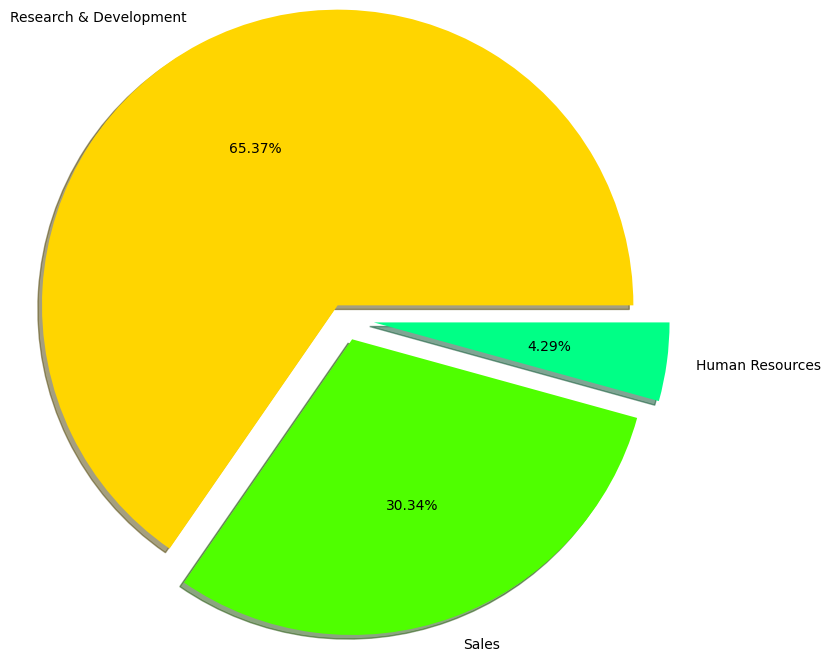

In [19]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [20]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


 #### Comment :
- 65.37% of Employees belong to Research & Development Department. Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.
- Only 63 Employee work in HR department.


In [23]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='winter_r')

#### Employee distribution as per education field and level of education

In [22]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

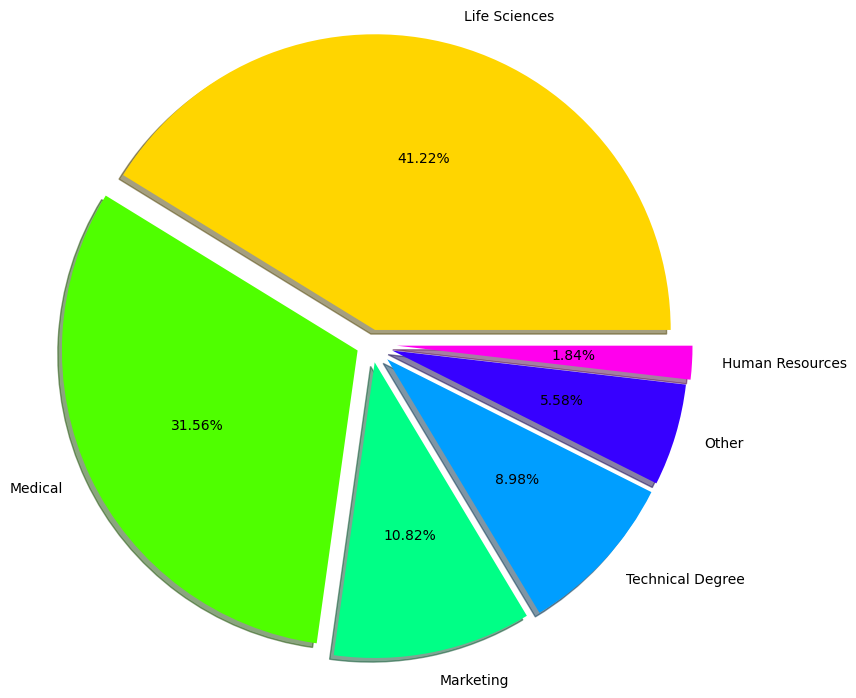

In [24]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [25]:
# Let check distribution of education Vs education Field
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='spring_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [26]:
# Let check distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='autumn_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


#### Comment:
- 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.
- There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that <b> atleast half employee working in HR department do not have HR background.</b> This important as there is <u>more probability of Employees Retention</u> is when they are working in domain of interest or as per their education background.<b> Dissatisfaction with want we doing can be seen as major reason of leaving job.</b>
- Most of Employees with Techanical degree are Bachelors.
- Most of Employees having Masters and Doctors belong to Life Science and Medical domain.
- R&D department almost everyone comes from profession or technical background except support staff.<b> Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.</b>
- There are 159 Employee with <u>Marketing background and all work in Sales Department.</u>
- 50% Employees in sales department have background of Life sciences & Medical.<b> So it will interesting to see attrition rate in these employees.</b>

<b> We will Analysis Attrition over above insight in next section of Job role.</b>

#### Lets work with Job Role

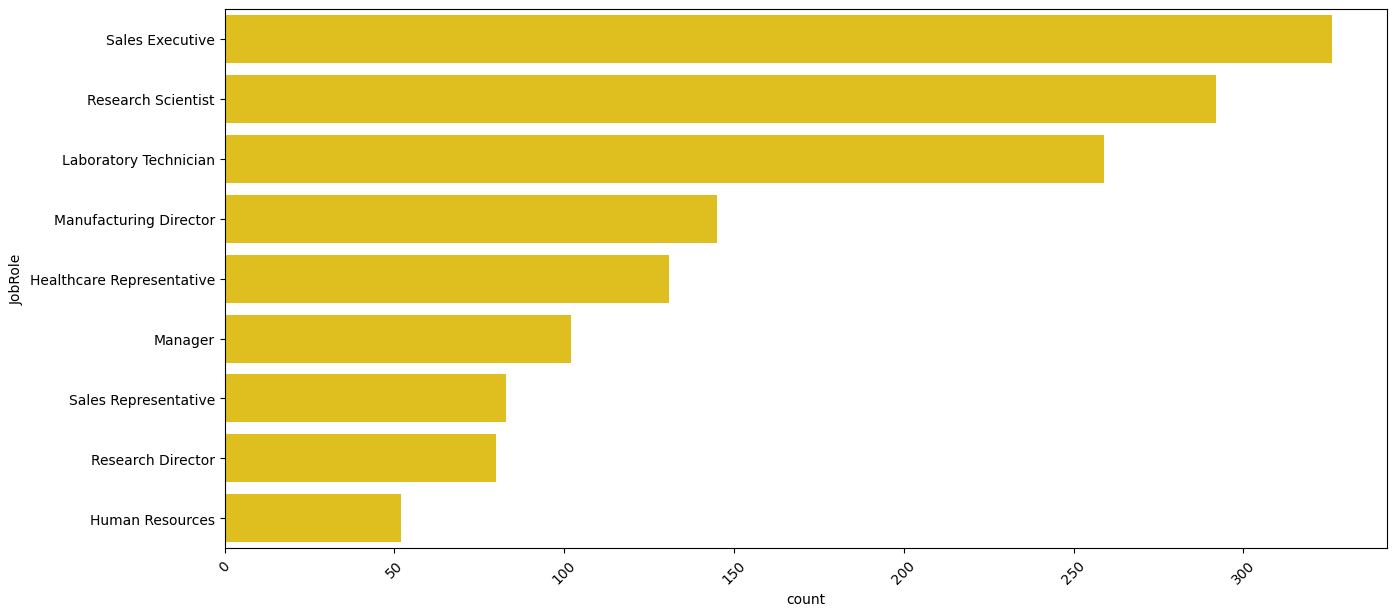

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
plt.show()

- <b>Before going for Attrition by Job role,</b>

first build matrix of department vs job role which will give us idea about number of employees of different job role across department

In [28]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


 #### Comment:
- There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.
- Human Resources department has 2 Job role i.e. HR & Manager.
- There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 1200x1000 with 0 Axes>

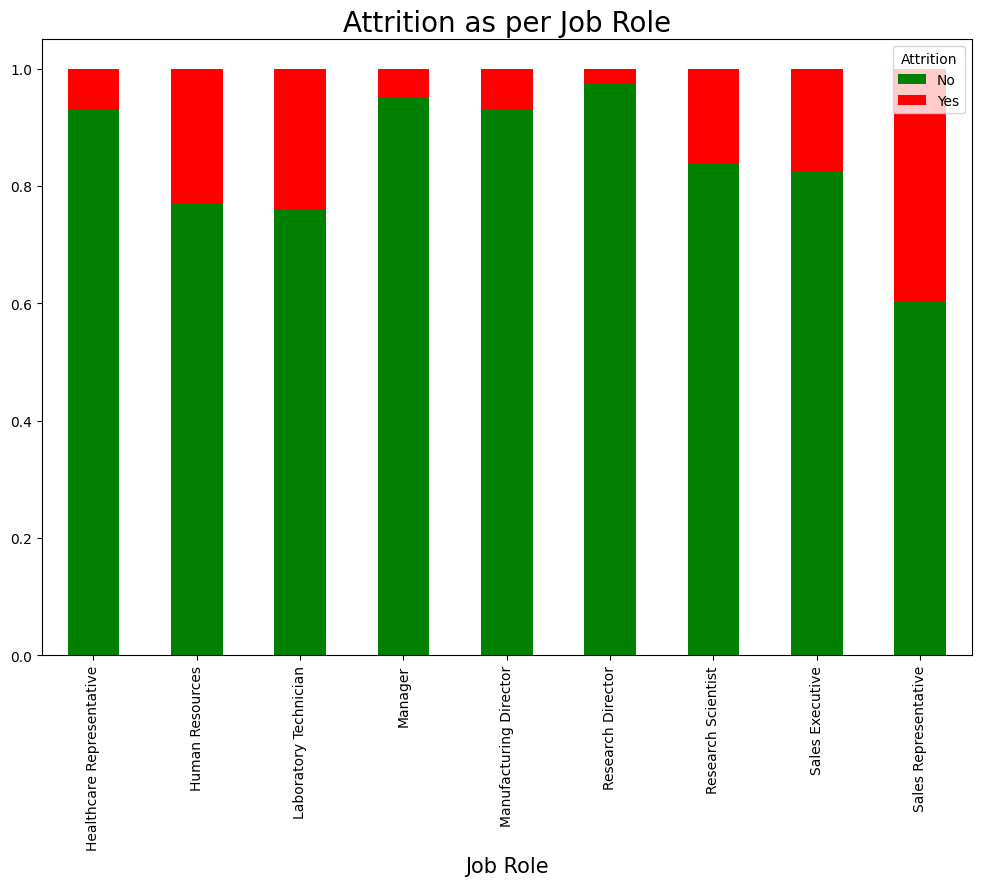

In [29]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

<b> We all can definitely see Red Signal for different Managers & HR of Respective Job Role in above barplot !!! </b>

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [30]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')

#### Comment:
- Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job role comes at bottom in corparate hierachy also Salary is comparatively less compare to other job role.
- Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.
- At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.
- 16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.
   

In [31]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#### Violinplot of Numeric Variables

In [32]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate',
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

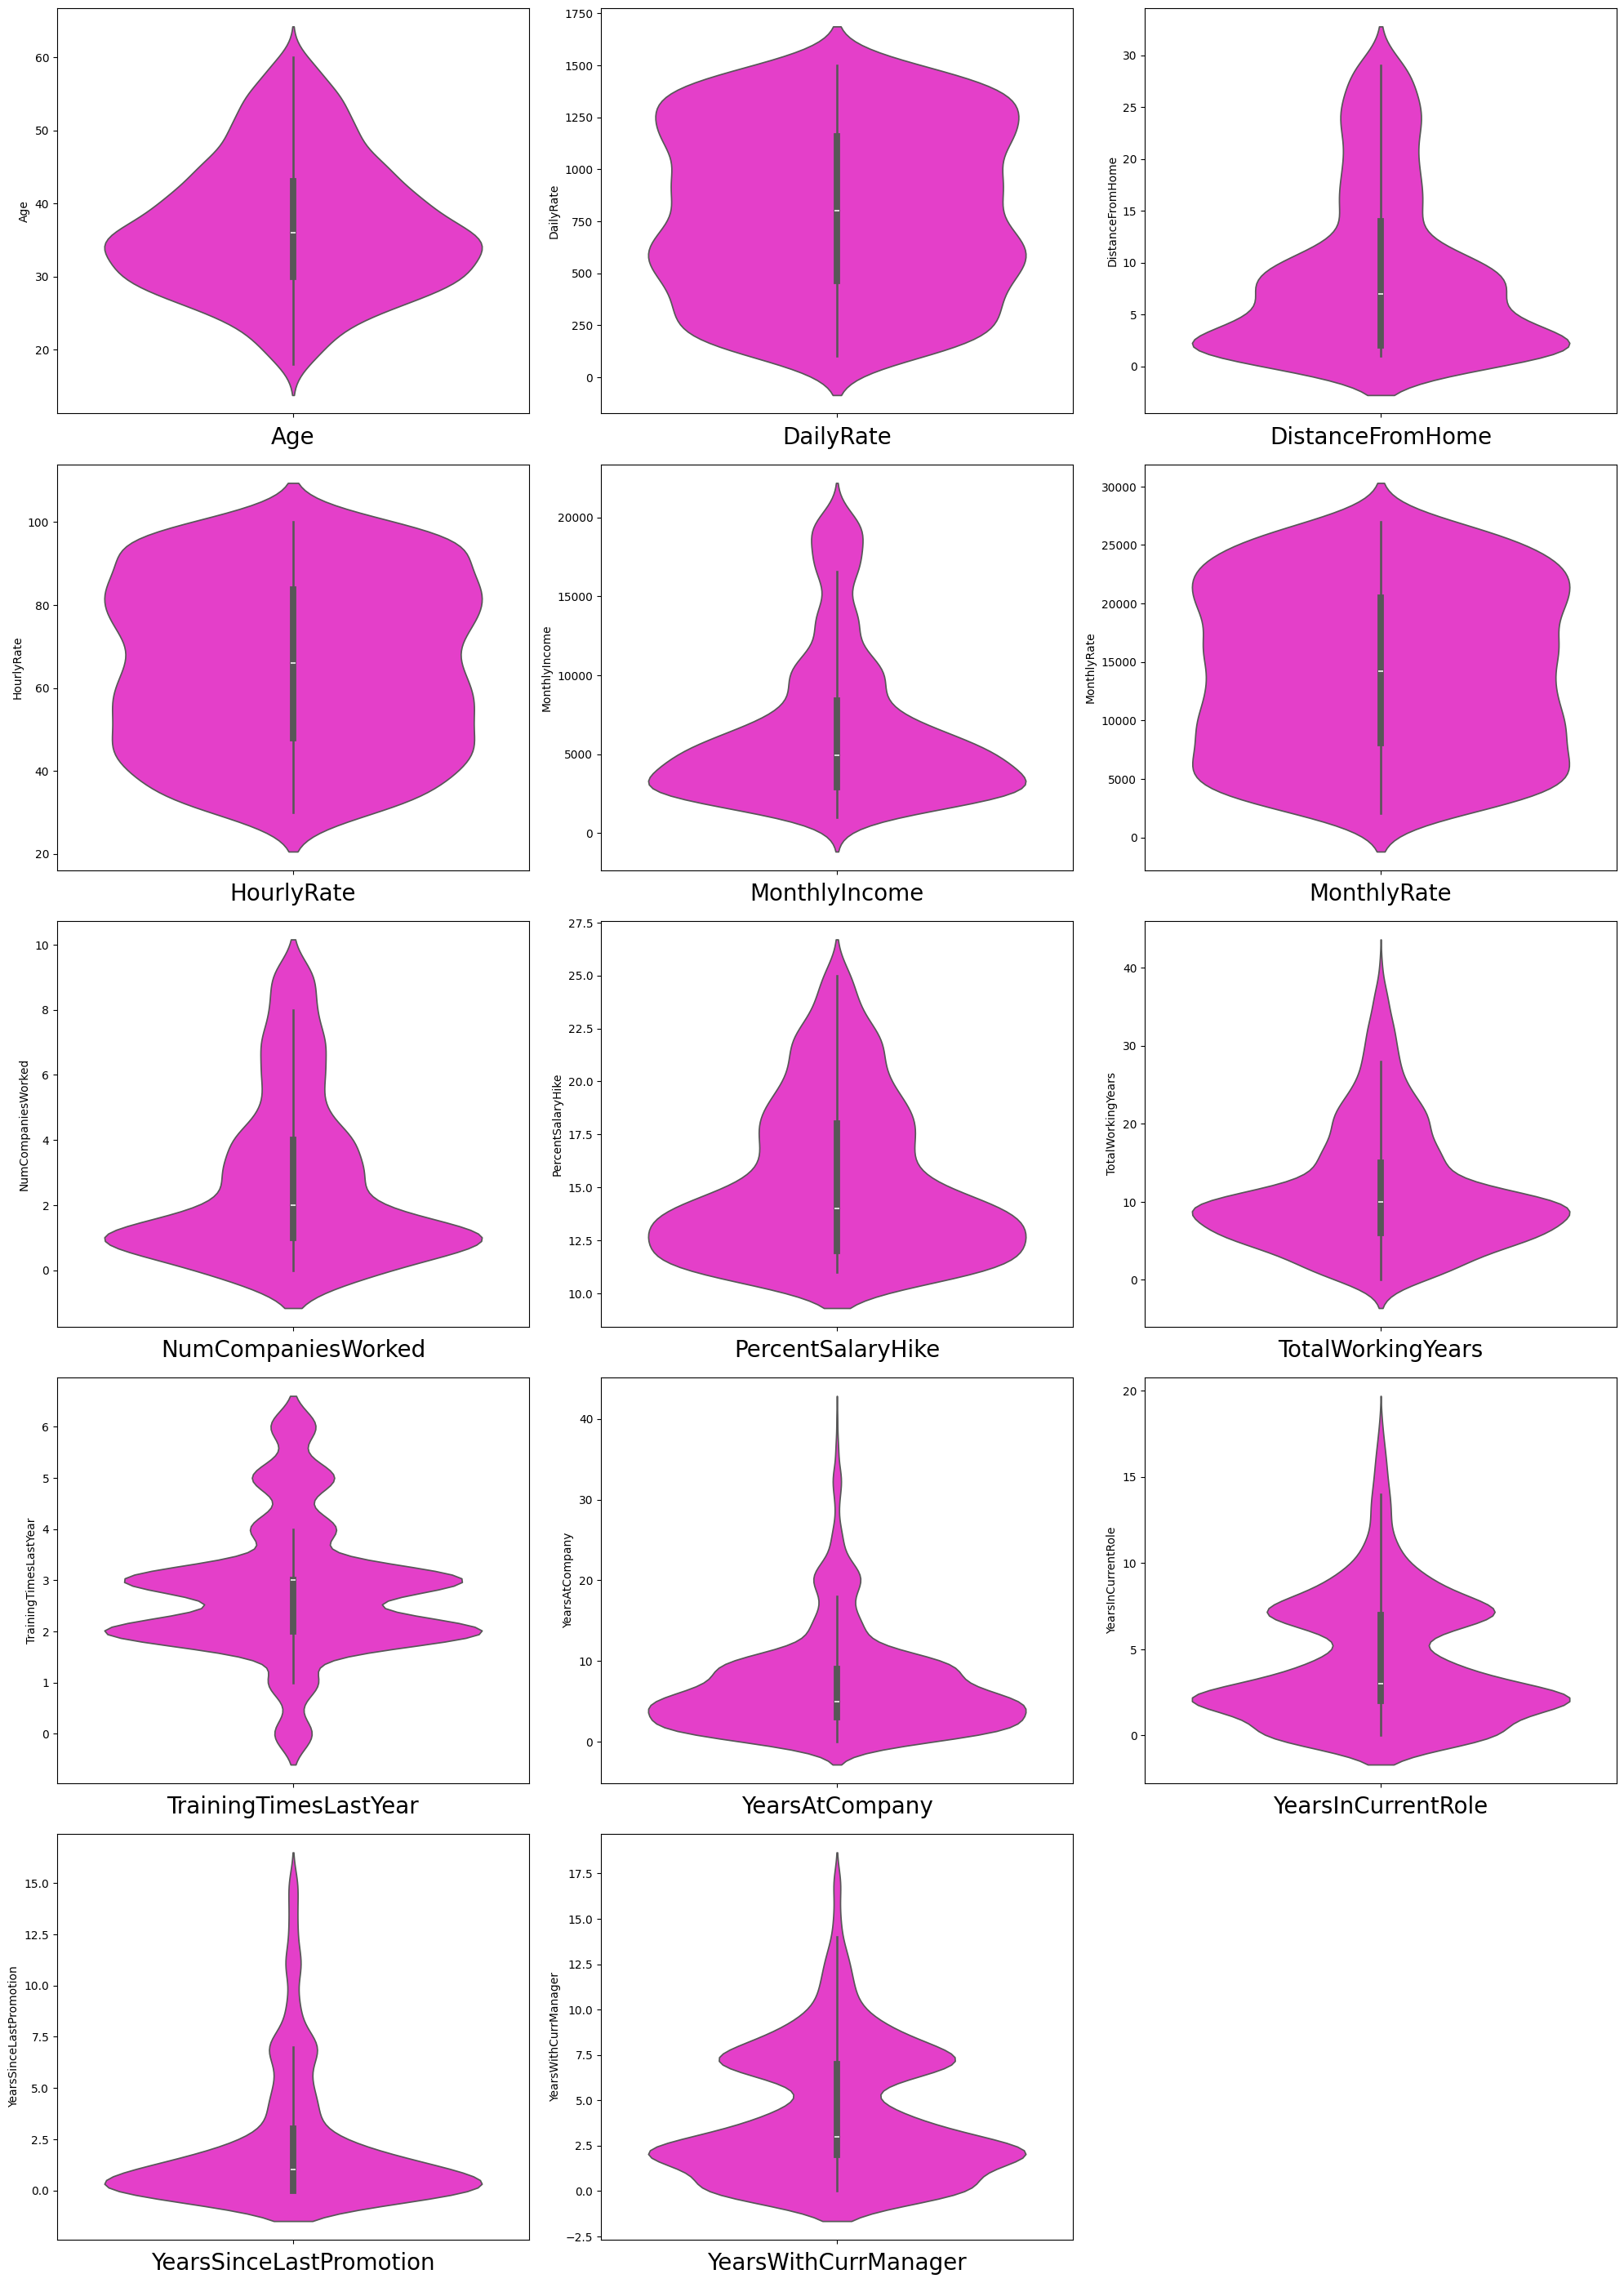

In [33]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Comment:
- For Majority of people have spend 3 to 10 years at company.
- Most of people staying company upto 2 years after promotion.
- Majority of people are are train 2-3 times in last year.If employees leaves job then it loss investment for company.
- Majority of people stay in same role for maximum 4 yrs.
- Majority of Employees have salary hike of 10 to 15%.

#### Age Vs Attrition

<Axes: ylabel='count'>

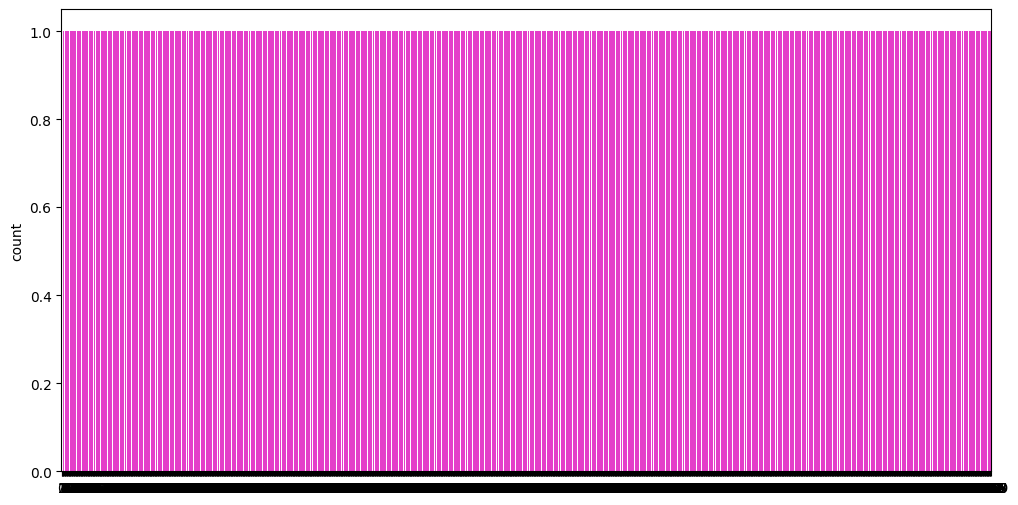

In [34]:
plt.subplots(figsize=(12,6))
sns.countplot(df['Age'])

<Axes: xlabel='Age', ylabel='count'>

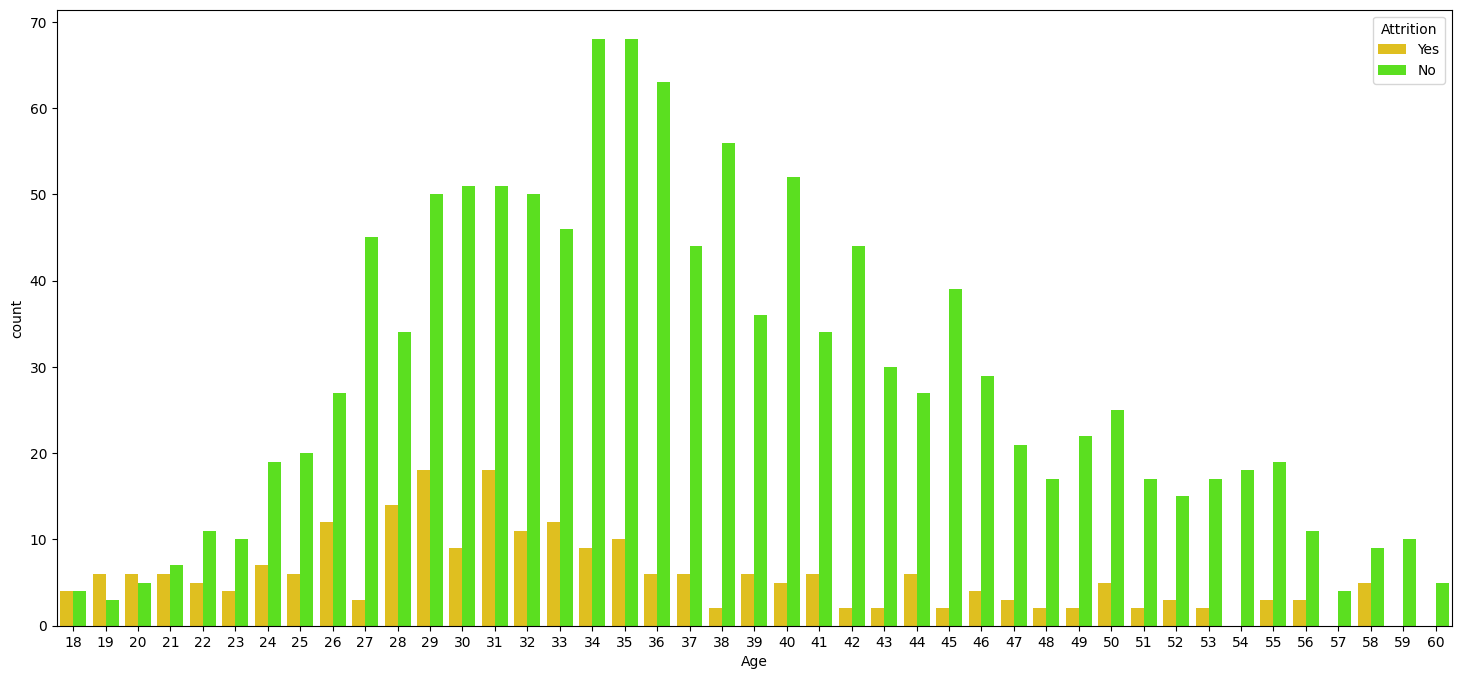

In [35]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

#### Comment:
1. The Attrition rate is minimum between the Age years of 34 and 35.   
2. The Attrition rate is maximum between the Age years of 29 and 31.

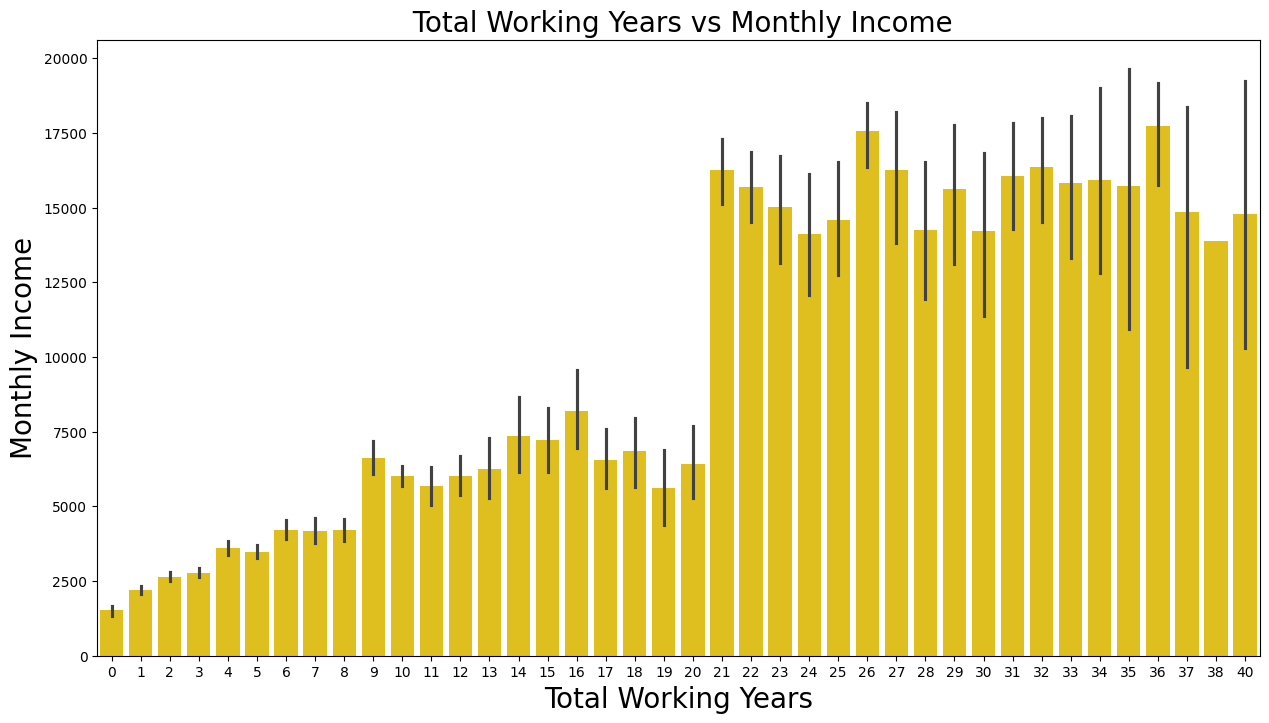

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['TotalWorkingYears'],y=df['MonthlyIncome']) # Pass x and y as named arguments
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

#### Comment:
   Monthly Income is highest for the employees with 21 or more number of Total Working Years.

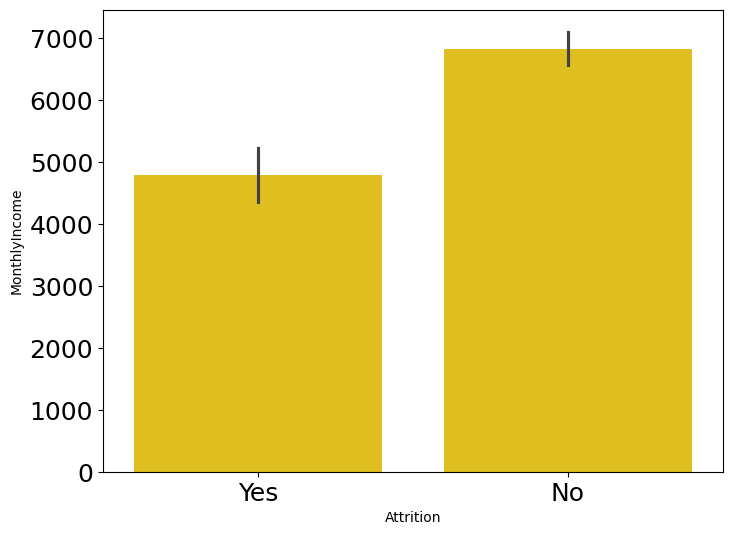

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#### Comment:
The Attrition rate in the employees is less when the monthly income reaches to 6900.

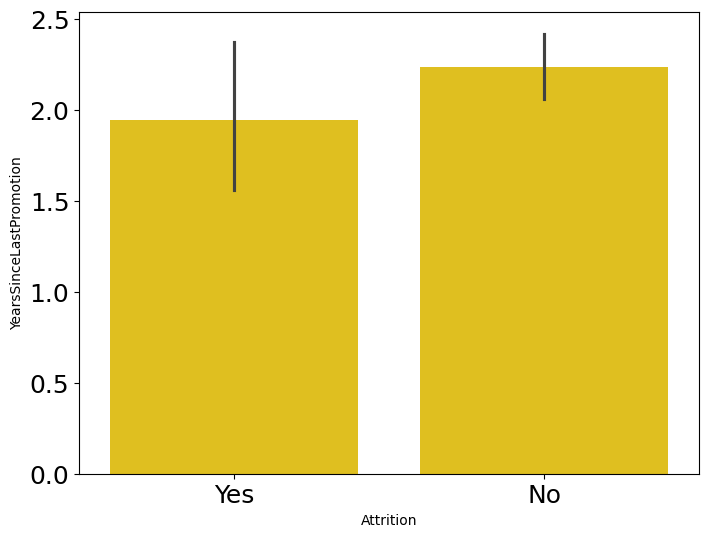

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#### Comment:
The rate of Attrition is high when the employee did not got promoted since 1.8 years.

In [41]:
df=pd.read_csv('/content/HR Data.csv')

# Encoding categorical data

In [42]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [43]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [44]:
df.shape

(1470, 31)

In [45]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


# Outliers Detection and Removal

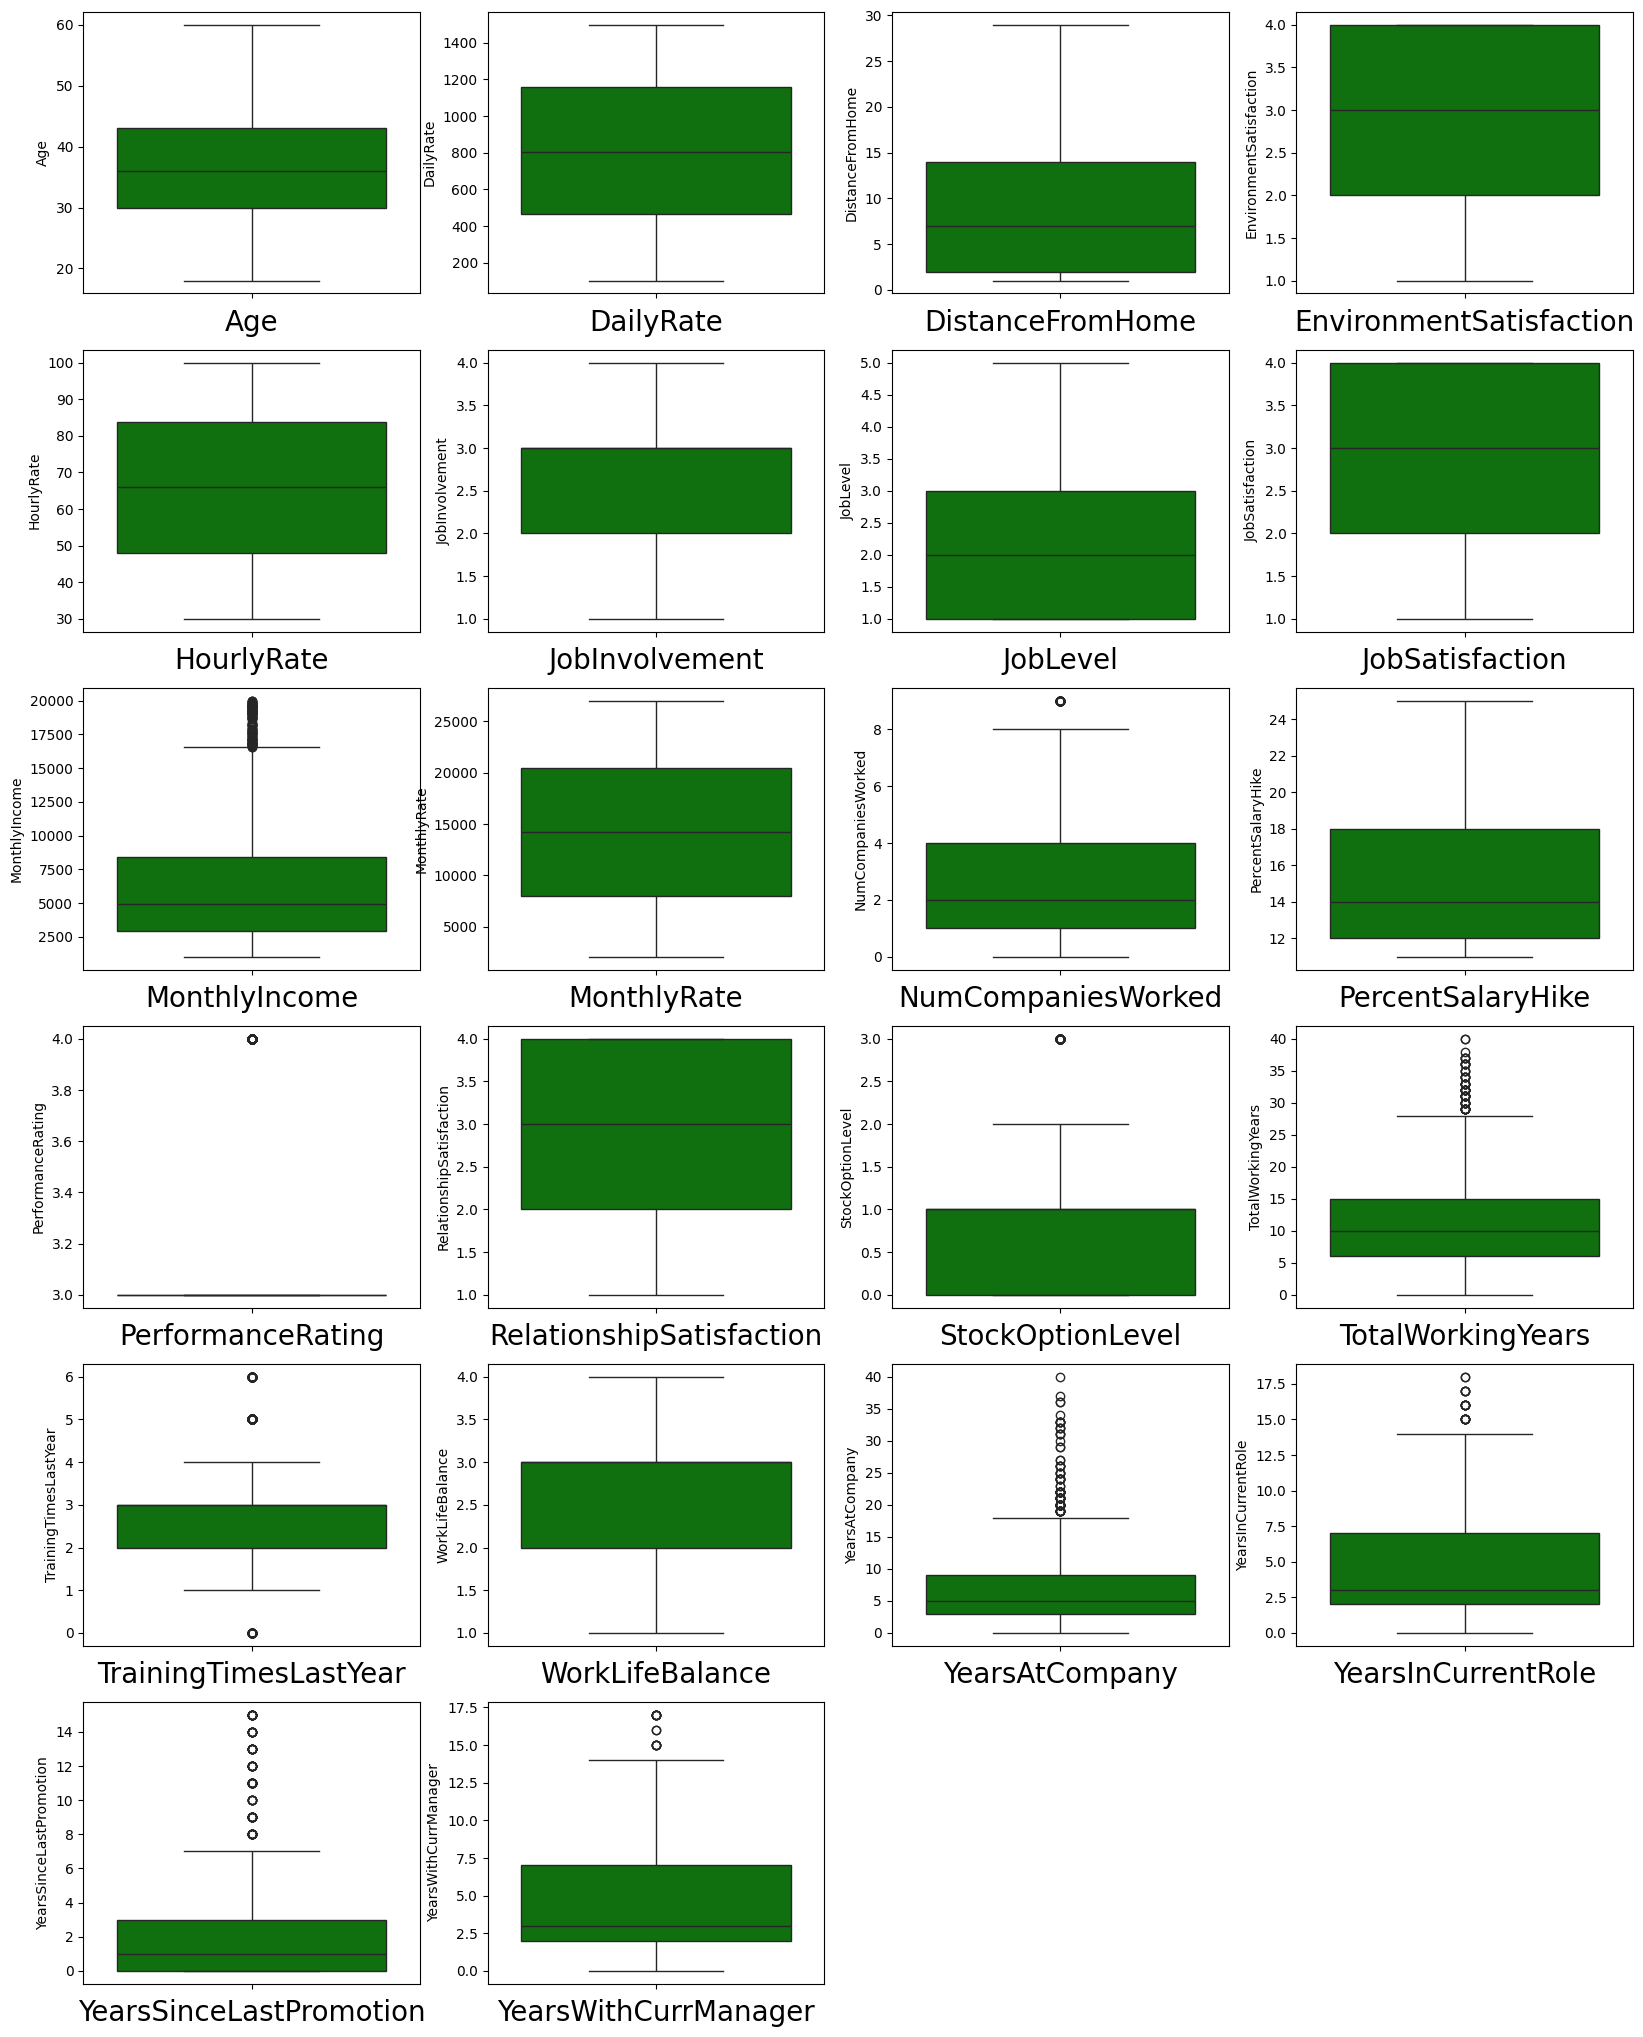

In [46]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Features containing outliers
"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


##### Data Loss

In [48]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')

Percentage Data Loss : 5.646258503401361 %


# Feature selection and Engineering

## 1. Skewness of features

In [49]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [50]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

#### Transforming  skew data using power transform

In [52]:
from sklearn.preprocessing import power_transform
df_transformed = power_transform(X) # Use X which holds the independent variables
df_transformed = pd.DataFrame(df_transformed, columns=X.columns) # Assign to a new variable to avoid overwriting original df
df_transformed.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191407
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

#### Comment :
- For Numeric features skewness is transform within permissible limit.
- For ordinal features & categorical features skew parameter irrevalent.

### 2. Corrleation

In [53]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,0.014098,-0.039430,0.025465,0.036424,0.453902,-0.112957,0.011763,-0.104372,0.443747,0.026954,0.309209,0.034180,0.005891,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.112393,0.036252,-0.001532,-0.133957,-0.171968,0.064283,-0.114206,0.160960,-0.161848,0.014888,0.050314,0.257237,-0.006267,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,0.001183,-0.025364,0.025424,0.028261,0.018996,0.000213,-0.032491,0.018687,0.033746,-0.010307,0.018764,0.022378,-0.023004,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,0.033123,-0.005242,0.014279,0.048004,0.022978,-0.015437,0.042698,-0.074113,0.035004,-0.029844,0.032948,0.020294,0.027802,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.014540,-0.030618,-0.002412,-0.024040,0.126809,0.678627,0.029521,0.052086,0.071876,0.022741,-0.044344,0.014908,-0.022678,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,-0.019279,-0.000819,0.028230,0.010106,0.008498,-0.000537,-0.009284,-0.021816,-0.015040,0.037052,-0.028307,0.026520,0.035864,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,-0.026223,-0.019166,0.010848,0.041343,0.083065,0.015140,-0.007219,-0.012726,0.072670,-0.018540,0.130812,-0.017166,-0.011344,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.047924,0.010676,-0.006539,-0.006876,-0.035795,0.017492,-0.050934,0.012073,-0.030017,-0.023384,0.001983,0.007912,-0.007845,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,1.000000,-0.015715,-0.040459,-0.012720,0.013835,-0.022354,-0.011186,-0.012453,0.003011,0.032916,0.015298,0.059355,-0.026797,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,-0.000819,-0.019166,0.010676,-0.015715,1.000000,0.004768,0.011939,-0.056970,-0.036831,0.036302,-0.056786,-0.047362,-0.045850,-0.030920,-0.051558,0.005443,-0.010757,0.041458,0.026438,-0.058555,-0.040211,0.000134,-0.045123,-0.025536,-0.028162,-0.036280


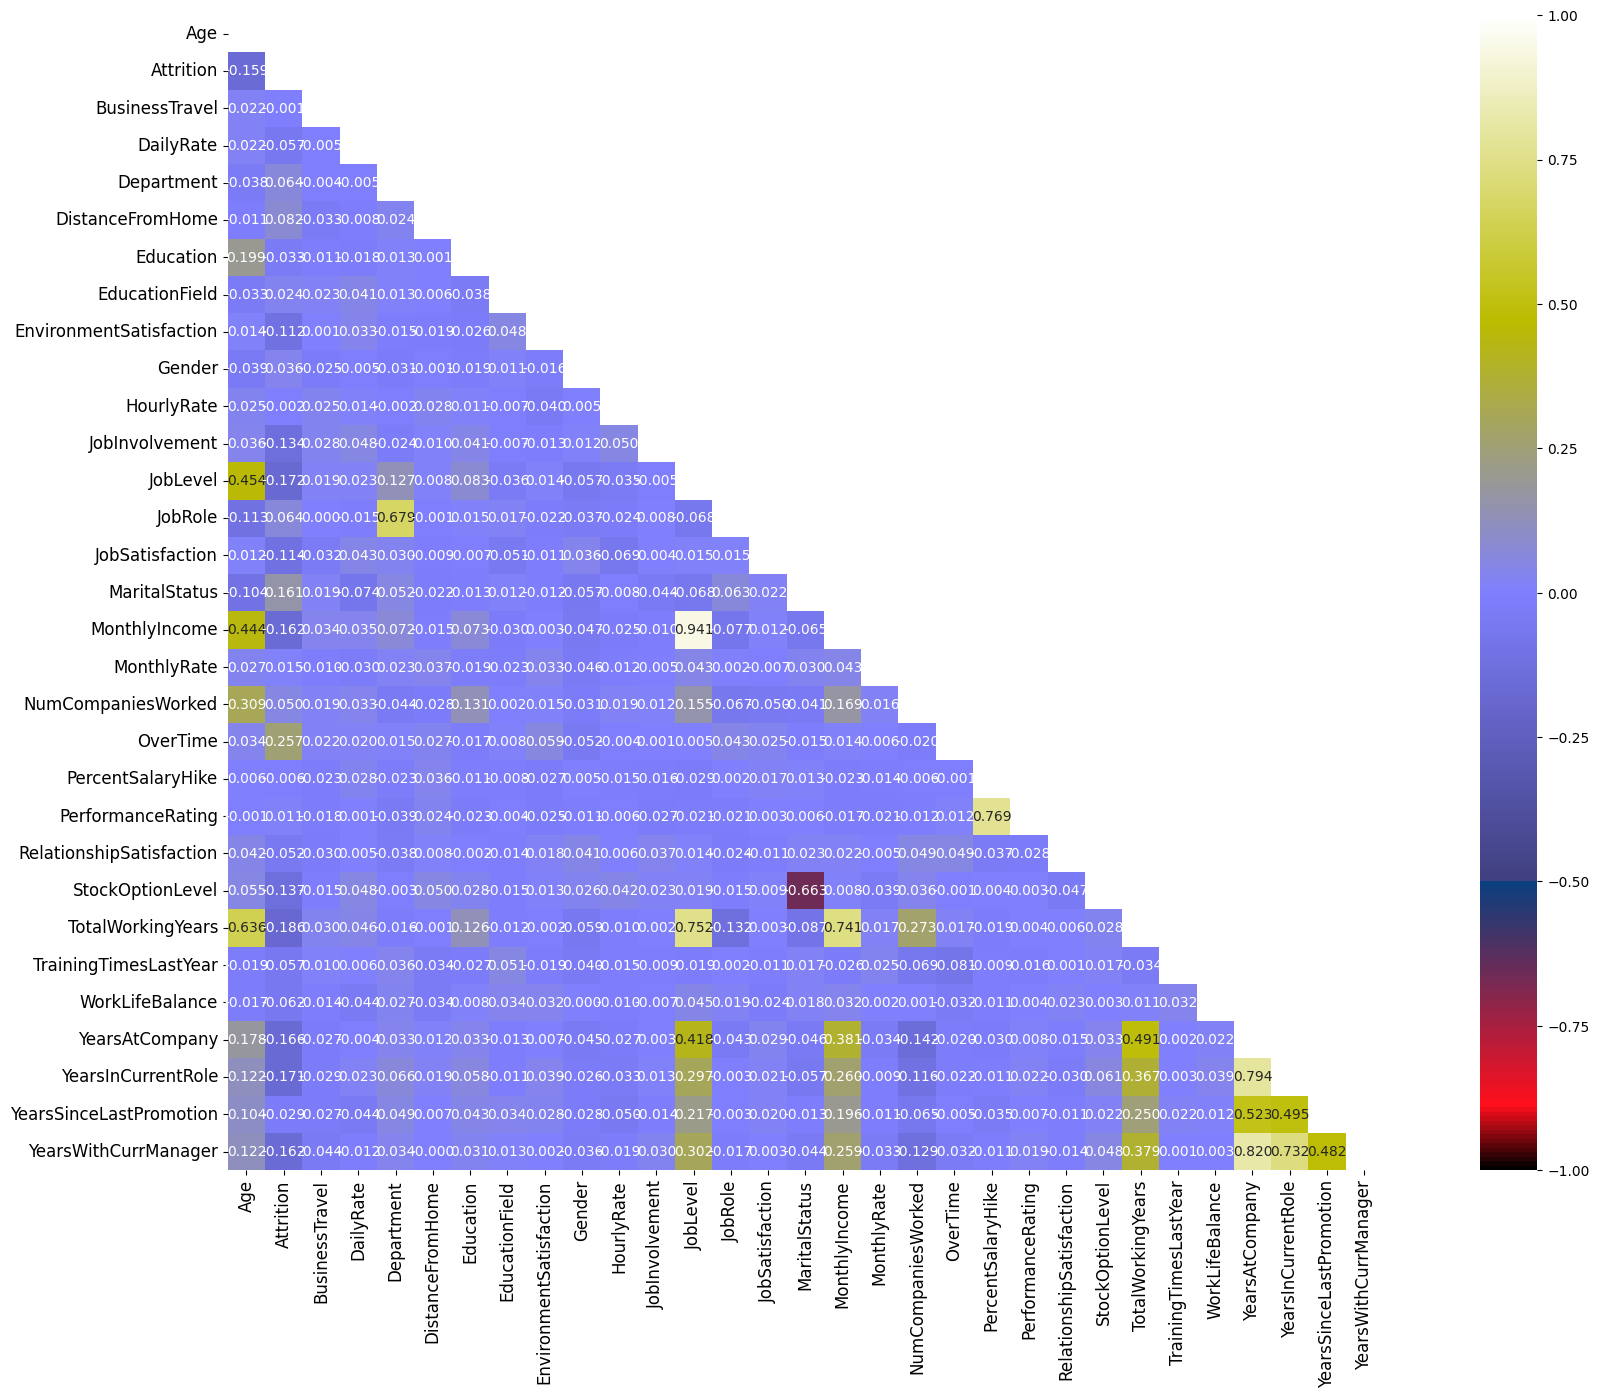

In [54]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

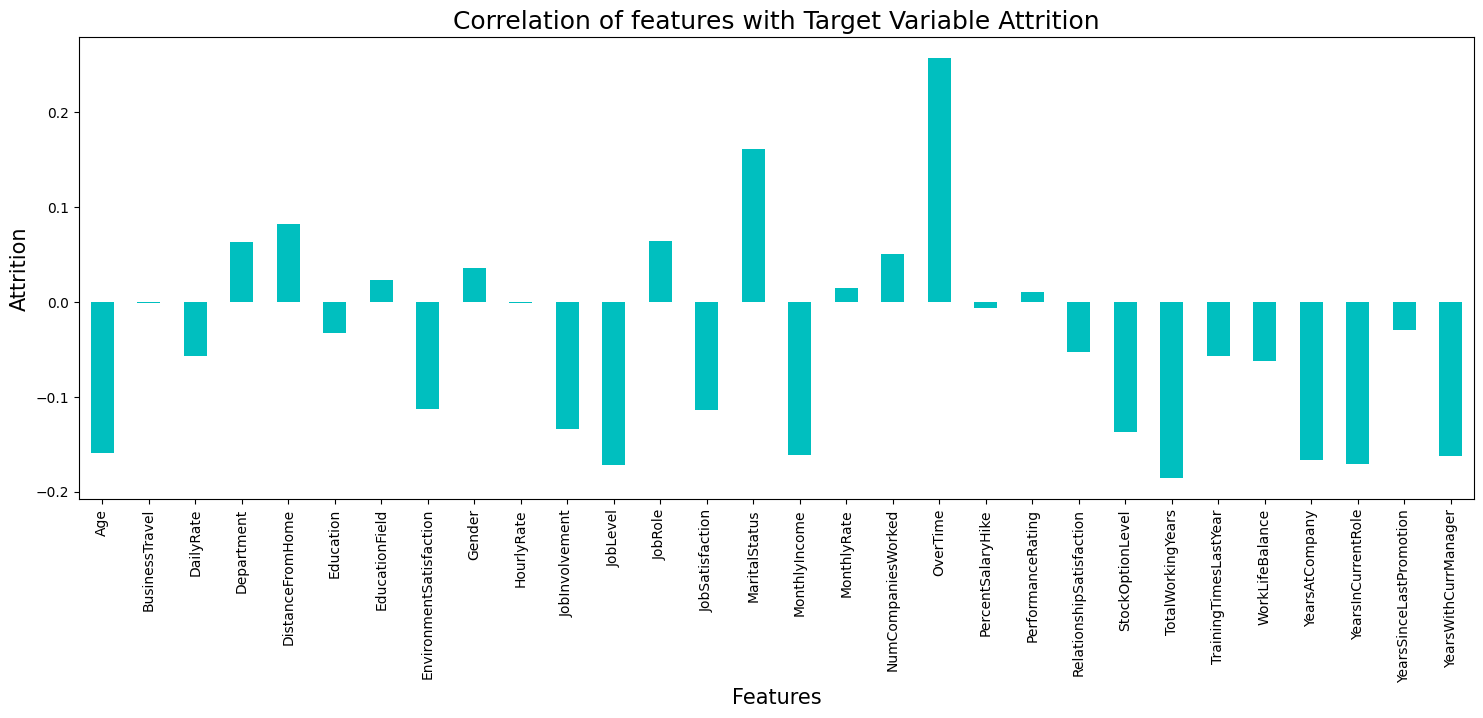

In [55]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

#### Comment:
- Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.
- JobLevel is highly positively correlated with the MonthlyIncome.
- PercentSalaryHike is highly positively correlated with the column PerformanceRating.

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,30.994586,Age
1,1.520532,Attrition
2,6.669133,BusinessTravel
3,5.041636,DailyRate
4,13.932479,Department
5,2.342119,DistanceFromHome
6,9.343006,Education
7,3.892970,EducationField
8,7.283358,EnvironmentSatisfaction
9,2.547848,Gender


#### Comment :
- We can see that multicollinerity is within permissible limit of 10.

### Balancing using SMOTE

<b> As data is Imbalanced in nature we will need to balance target variable.</b>

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [59]:
Y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

## Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

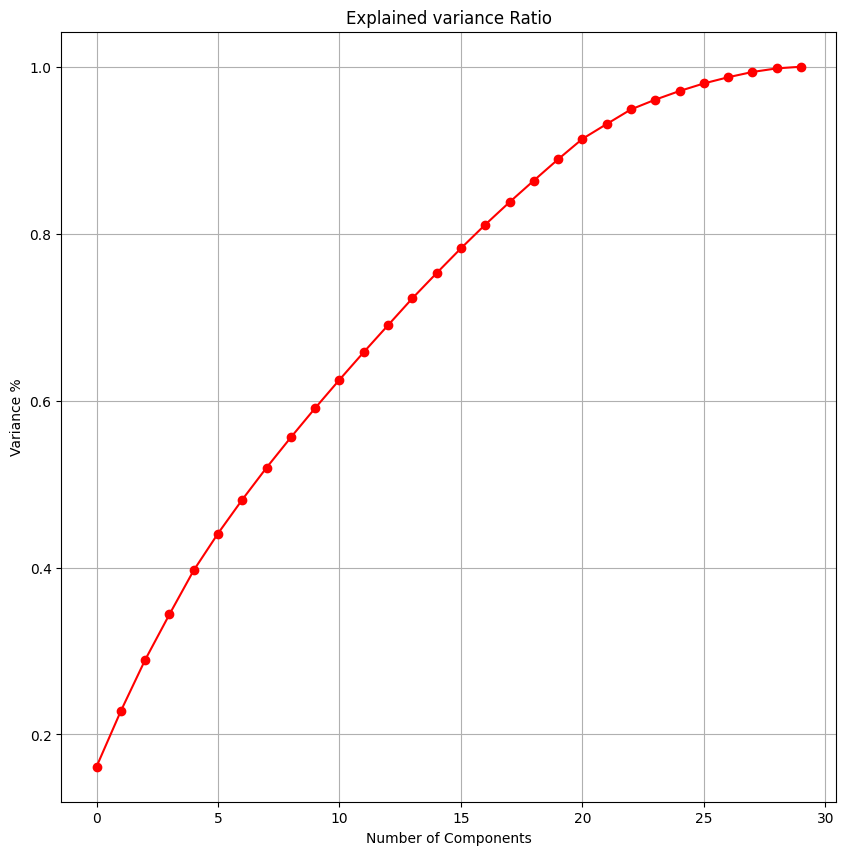

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data.  We shall pick the first 21 components for our prediction </b>

In [62]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [63]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

# Machine Learning Model Building

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1551, 21)
Training target vector size: (1551,)
Test feature matrix size: (765, 21)
Test target vector size: (765,)


### Finding best Random state

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8758169934640523 on Random_state 75


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8758169934640523


Confusion matrix of Logistics Regression : 
 [[323  45]
 [ 50 347]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       368
           1       0.89      0.87      0.88       397

    accuracy                           0.88       765
   macro avg       0.88      0.88      0.88       765
weighted avg       0.88      0.88      0.88       765



### Finding Optimal value of n_neighbors for KNN

In [70]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3352883843105734
RMSE value for k=  2 is: 0.28468535549618096
RMSE value for k=  3 is: 0.33916467937944555
RMSE value for k=  4 is: 0.3046480879906189
RMSE value for k=  5 is: 0.3448974461575688
RMSE value for k=  6 is: 0.32938842120837186
RMSE value for k=  7 is: 0.3704792868174742
RMSE value for k=  8 is: 0.3429971702850177
RMSE value for k=  9 is: 0.37747007845751024
RMSE value for k=  10 is: 0.36693394892789216
RMSE value for k=  11 is: 0.39107694443752145
RMSE value for k=  12 is: 0.3651483716701107
RMSE value for k=  13 is: 0.37747007845751024
RMSE value for k=  14 is: 0.3633540199183844
RMSE value for k=  15 is: 0.37747007845751024


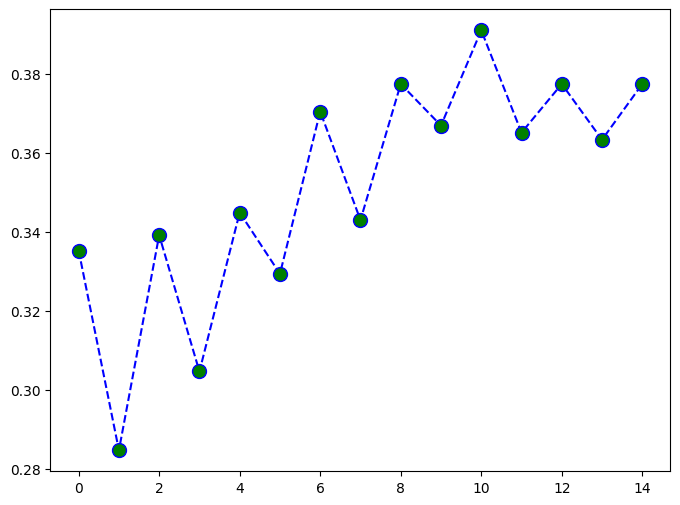

In [72]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(15), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment-
At k= 2, we get the minimum RMSE value which approximately 0.30032661958503204, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

----------------------------------------------------------------------------------------------------------------------

## Applying other classification algorithm

In [73]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9176470588235294


Confusion matrix : 
 [[339  29]
 [ 34 363]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       368
           1       0.93      0.91      0.92       397

    accuracy                           0.92       765
   macro avg       0.92      0.92      0.92       765
weighted avg       0.92      0.92      0.92       765



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8614379084967321


Confusion matrix : 
 [[317  51]
 [ 55 342]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       368
           1       0.87      0.86      0.87       397

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765




##### We can see that  RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

# CrossValidation :

In [74]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.64008621 0.71922246 0.72570194 0.67818575 0.66738661]
Mean Score : 0.6861165934311463
Std deviation : 0.032235091647905785




Cross Validation Score SVC() :

Score : [0.57758621 0.64578834 0.60259179 0.62203024 0.59611231]
Mean Score : 0.6088217770164593
Std deviation : 0.02331091613142026




Cross Validation Score GaussianNB() :

Score : [0.67025862 0.77537797 0.73866091 0.76673866 0.76241901]
Mean Score : 0.7426910329932227
Std deviation : 0.03820631740464323




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68965517 0.89848812 0.87257019 0.86609071 0.88984881]
Mean Score : 0.8433306025173157
Std deviation : 0.07771153045661579




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.70043103 0.7300216  0.74730022 0.74082073 0.74298056]
Mean Score : 0.7323108289267892
Std deviation : 0.01692634207156771




Cross Validation Score RandomForestClassifier() :

Score : [0.70689655 0.9827213

#### On basis of maximum score in crossvalidation of  Random Forest Classifier.  we will apply Hyperparameter tuning on Random Forest model

# Hyper Parameter Tuning : GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None],
              'max_features': ['auto', 'log2'],
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [77]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [78]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 100}

# Final Model

In [79]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9006535947712418


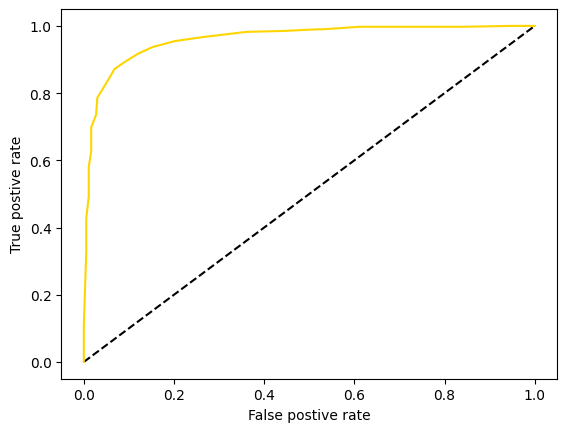

Auc Score :
 0.9010068721936262


In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [81]:
import joblib
joblib.dump(Final_mod,'HR_Analytics_Final.pkl')

['HR_Analytics_Final.pkl']